In [1]:
import torch
import matplotlib.pyplot as plt
from dataload import *
from gan_architecture import *
from utils import *

In [2]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
device

device(type='cpu')

## Parameters

Loaded image shape in tensor: torch.Size([16, 3, 128, 128])


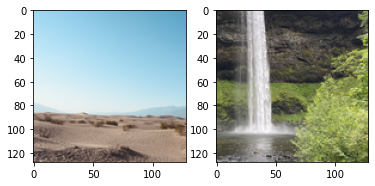

In [3]:
batch_size = 16

train_loader, _ = define_loaders(batch_size, batch_size, 
                             rescale=256,
                             crop=128,
                             test_set=False,
                             dataset="data/lhq_256")

z_dim = 256

# get minibatch
x = next(iter(train_loader))
x_test = next(iter(train_loader))


print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = (minmax_scale(x, 0, 1))[0].numpy().transpose((1, 2, 0))
img2 = minmax_scale(x_test, 0, 1)[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [4]:
x.min(), x.max()

(tensor(0.), tensor(1.))

## Test trained model

In [5]:
model = Generator(z_dim).to(device)
model2 = Discriminator().to(device)
x = torch.randn(batch_size, z_dim)
x = x.to(device)
generated = (model(x))
model2(generated)
print(f"Number of parameters : D : {get_n_params(model2)}, G : {get_n_params(model)}")

GENERATOR
Start torch.Size([16, 256])
After decoder_lin torch.Size([16, 4096])
After unflatten torch.Size([16, 1024, 2, 2])
After block1 torch.Size([16, 512, 4, 4])
After block3 torch.Size([16, 512, 4, 4])
After block4 torch.Size([16, 256, 8, 8])
After block5 torch.Size([16, 256, 8, 8])
After block6 torch.Size([16, 128, 16, 16])
After block7 torch.Size([16, 128, 16, 16])
After block8 torch.Size([16, 128, 32, 32])
After attn9 torch.Size([16, 128, 32, 32])
After block10 torch.Size([16, 64, 64, 64])
After block11 torch.Size([16, 64, 64, 64])
After block12 torch.Size([16, 3, 128, 128])
DISCRIMINATOR torch.Size([16, 3, 128, 128])
After block1 torch.Size([16, 64, 128, 128])
After block2 torch.Size([16, 64, 64, 64])
After block3 torch.Size([16, 64, 64, 64])
After block4 torch.Size([16, 128, 32, 32])
After block5 torch.Size([16, 128, 32, 32])
After block6 torch.Size([16, 128, 16, 16])
After block7 torch.Size([16, 256, 8, 8])
After block8 torch.Size([16, 256, 8, 8])
After attn9 torch.Size([16, 

In [10]:
import pandas as pd
fichier = "res-gan"


model = Generator(z_dim)#.to(device)
#model2 = Discriminator().to(device)
model.load_state_dict(torch.load(f"saved_models/{fichier}_generator.sav"))

RuntimeError: Error(s) in loading state_dict for Generator:
	Missing key(s) in state_dict: "block5.skip2.weight", "block5.skip2.bias", "block5.skip.1.weight", "block5.skip.1.bias", "block5.block.5.weight", "block5.block.5.bias", "block5.block.5.running_mean", "block5.block.5.running_var", "block6.block.3.weight", "block6.block.4.bias", "block6.block.4.running_mean", "block6.block.4.running_var", "block7.skip2.weight", "block7.skip2.bias", "block7.skip.1.weight", "block7.skip.1.bias", "block7.block.5.weight", "block7.block.5.bias", "block7.block.5.running_mean", "block7.block.5.running_var", "block8.block.3.weight", "block8.block.4.bias", "block8.block.4.running_mean", "block8.block.4.running_var", "block10.skip2.weight", "block10.skip2.bias", "block10.skip.1.weight", "block10.skip.1.bias", "block10.block.5.weight", "block10.block.5.bias", "block10.block.5.running_mean", "block10.block.5.running_var", "block11.block.3.weight", "block11.block.4.bias", "block11.block.4.running_mean", "block11.block.4.running_var", "block12.skip.1.weight", "block12.skip.1.bias", "block12.block.4.weight". 
	Unexpected key(s) in state_dict: "block4.skip2.weight", "block4.skip2.bias", "block4.skip.1.weight", "block4.skip.1.bias", "block4.block.0.weight", "block4.block.1.weight", "block4.block.1.bias", "block4.block.1.running_mean", "block4.block.1.running_var", "block4.block.1.num_batches_tracked", "block4.block.4.weight", "block4.block.5.weight", "block4.block.5.bias", "block4.block.5.running_mean", "block4.block.5.running_var", "block4.block.5.num_batches_tracked", "block5.block.3.weight", "block5.block.4.bias", "block5.block.4.running_mean", "block5.block.4.running_var", "block5.block.4.num_batches_tracked", "block6.skip2.weight", "block6.skip2.bias", "block6.skip.1.weight", "block6.skip.1.bias", "block6.block.5.weight", "block6.block.5.bias", "block6.block.5.running_mean", "block6.block.5.running_var", "block6.block.5.num_batches_tracked", "block7.block.3.weight", "block7.block.4.bias", "block7.block.4.running_mean", "block7.block.4.running_var", "block7.block.4.num_batches_tracked", "block8.block.5.weight", "block8.block.5.bias", "block8.block.5.running_mean", "block8.block.5.running_var", "block8.block.5.num_batches_tracked", "block9.skip2.weight", "block9.skip2.bias", "block9.skip.1.weight", "block9.skip.1.bias", "block10.block.3.weight", "block10.block.4.bias", "block10.block.4.running_mean", "block10.block.4.running_var", "block10.block.4.num_batches_tracked", "block11.block.5.weight", "block11.block.5.bias", "block11.block.5.running_mean", "block11.block.5.running_var", "block11.block.5.num_batches_tracked", "block12.skip.0.weight", "block12.skip.0.bias", "block12.block.3.weight". 
	size mismatch for generator_lin.0.weight: copying a param with shape torch.Size([4096, 512]) from checkpoint, the shape in current model is torch.Size([4096, 256]).
	size mismatch for block5.block.0.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3, 3]).
	size mismatch for block5.block.1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for block5.block.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for block5.block.1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for block5.block.1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for block5.block.4.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([256, 512, 3, 3]).
	size mismatch for block6.block.4.weight: copying a param with shape torch.Size([128, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for block7.block.0.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 256, 3, 3]).
	size mismatch for block7.block.1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for block7.block.1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for block7.block.1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for block7.block.1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for block7.block.4.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([128, 256, 3, 3]).
	size mismatch for block8.block.4.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block9.block.4.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for block9.block.5.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block9.block.5.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block9.block.5.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block9.block.5.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block10.block.0.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3, 3]).
	size mismatch for block10.block.1.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block10.block.1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block10.block.1.running_mean: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block10.block.1.running_var: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for block10.block.4.weight: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([64, 128, 3, 3]).
	size mismatch for block11.block.4.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64]).

In [11]:
testacc = pd.read_csv(f"saved_models/{fichier}_testaccs.csv")
plt.plot(testacc.index, testacc["discriminator"], label = "discriminator")

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/res-gan_testaccs.csv'

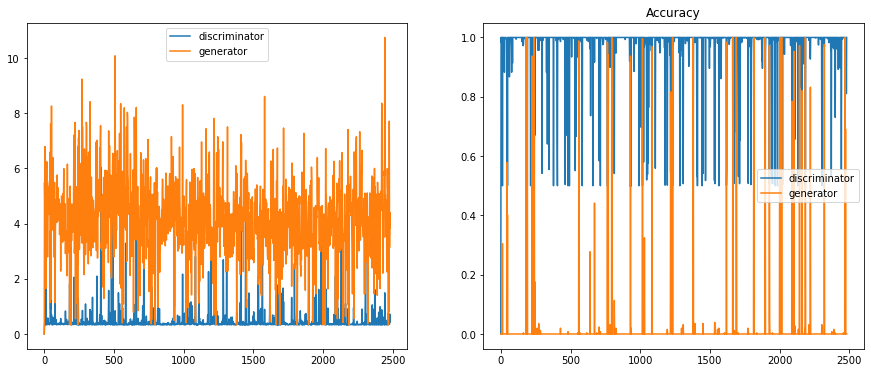

In [12]:
losses = pd.read_csv(f"saved_models/{fichier}_losses.csv")[::2]
acc = pd.read_csv(f"saved_models/{fichier}_accs.csv")[::2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(losses.index, losses["discriminator"], label = "discriminator")
ax1.plot(losses.index, losses["generator"], label = "generator")
plt.title("Loss")
ax1.legend()
plt.grid()
ax2.plot(acc.index, acc["discriminator"], label = "discriminator")
ax2.plot(acc.index, acc["generator"], label = "generator")
plt.title("Accuracy")
ax2.legend()
plt.grid()

Shape : torch.Size([16, 3, 224, 224])


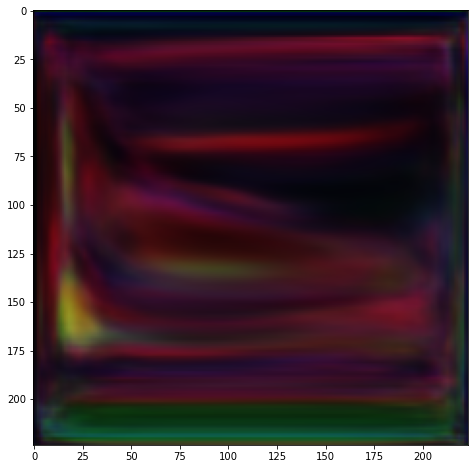

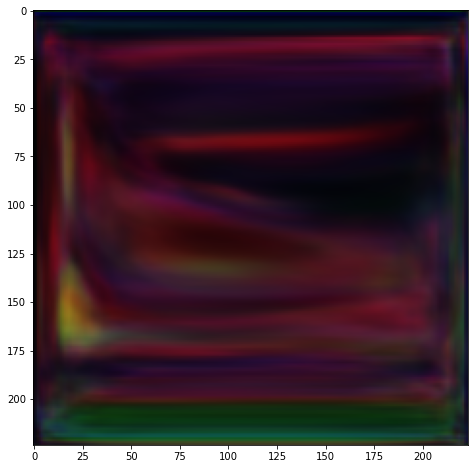

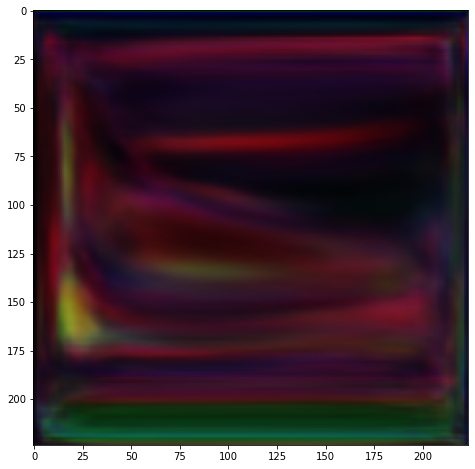

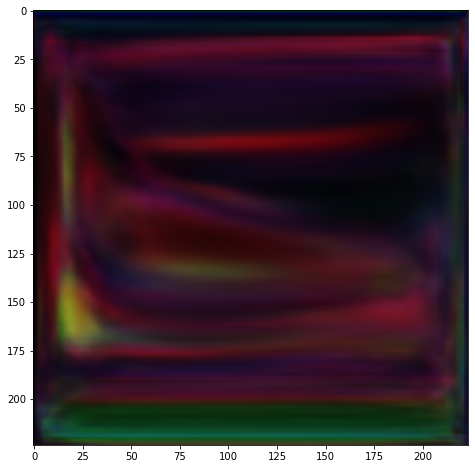

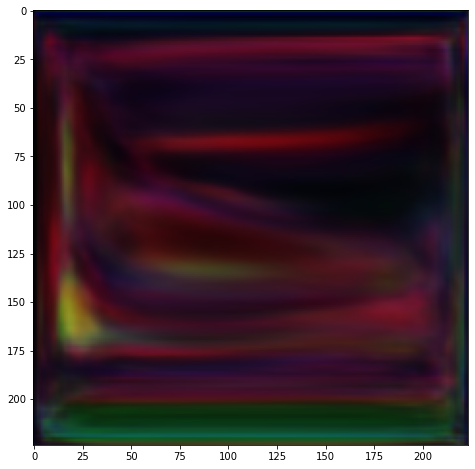

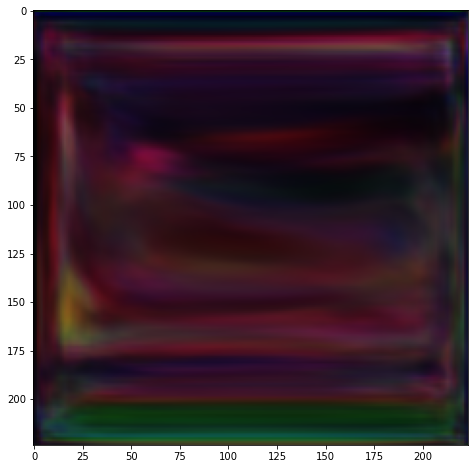

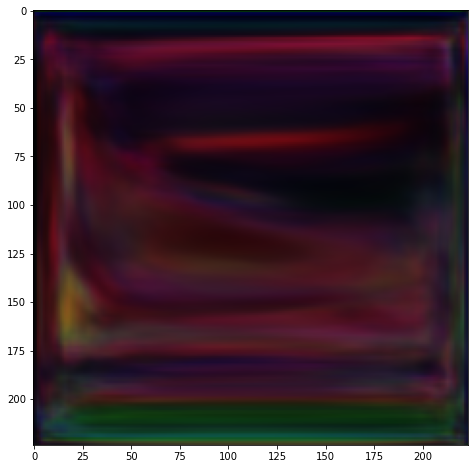

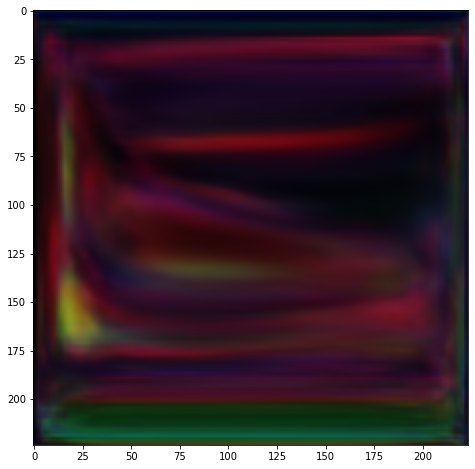

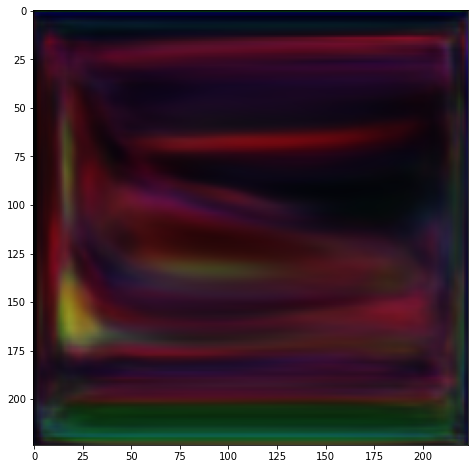

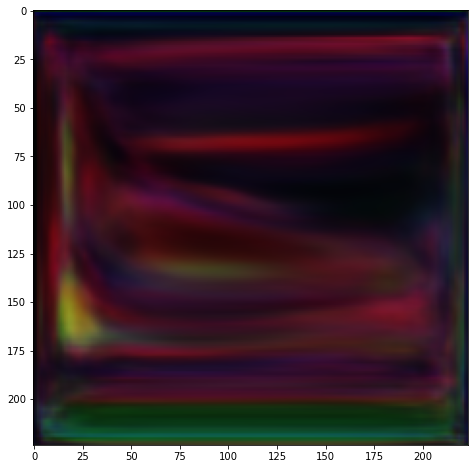

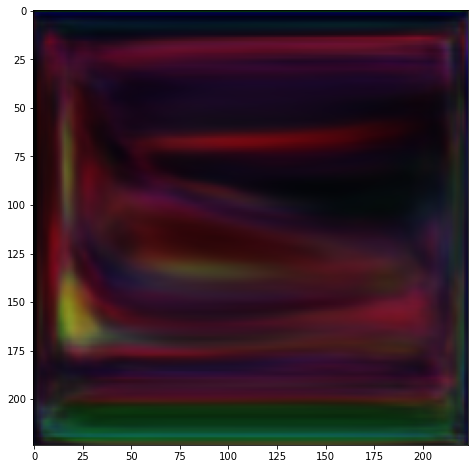

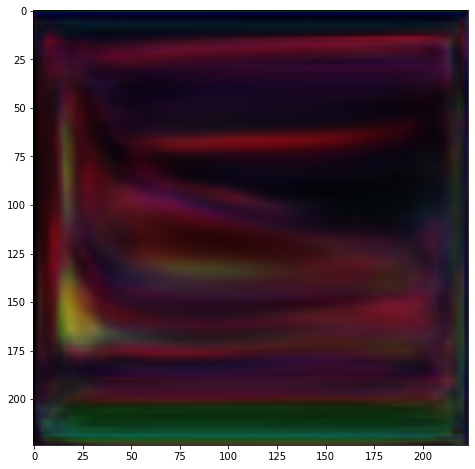

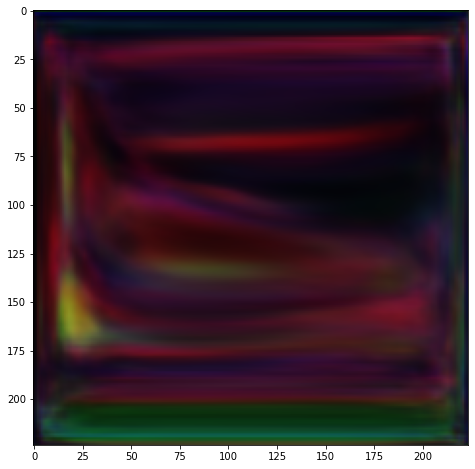

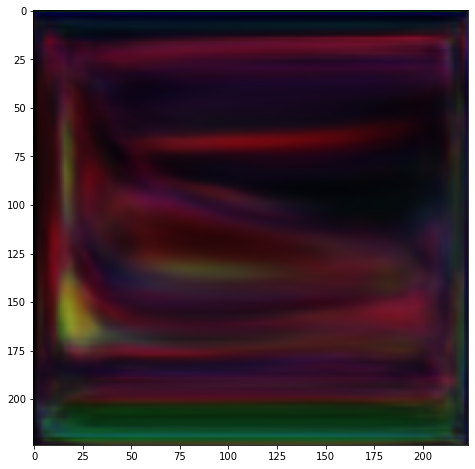

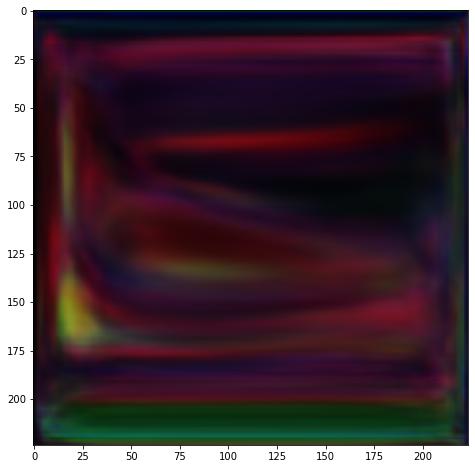

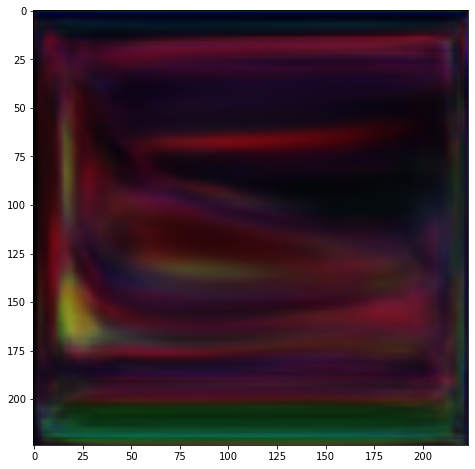

In [ ]:
x = torch.randn(batch_size, z_dim)
i = np.random.randint(15)
x = x.to(device)
generated = model(x)
print(f"Shape : {generated.shape}")
#axes[0].imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))
for i in range(batch_size):
    fig,axes = plt.subplots(1,1, figsize=(8,8))
    axes.imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))